# 1. Perkenalan

## Graded Challenge 3 

## Identifikasi Masalah

* Nama : Iqbal Awis Nurdiansyah
* Batch : RMT-19


Latar Belakang : Saya adalah seorang data scientis yang akan membuat model Classification untuk memprediksi apakah seorang pasien akan meninggal atau tidak menggunakan dataset yang sudah Anda dapatkan

Objective : mendapatkan prediksi pasien

Deskripsi Dataset : 

age     : Age
anaemia : Decrease of red blood cells or hemogloblin


# 2. Query SQL

select * from `ftds-hacktiv8-project.phase1_ftds_019_rmt.heart-failure`

# 3. Import Libraries

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import create_report
from scipy.stats import chi2_contingency

# Preprocessing
from feature_engine.outliers import Winsorizer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer

# Model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


#evaluasi
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
# classification evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, f1_score, roc_curve, precision_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
#Saving
import joblib
import pickle
import json

# 4. Data Loading

In [18]:
df = pd.read_csv('h8dsft_P1G3_iqbal.csv')
pd.set_option('display.max_columns', None)

In [19]:
# Load 10 data teratas
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [20]:
# load 10 data terbawah
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [21]:
df.shape

(299, 13)

In [22]:
#cek duplikasi data
df.duplicated(keep=False).sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# 5. EDA

In [24]:
num_cols=df[['age', 'creatinine_phosphokinase' , 'ejection_fraction' , 'platelets' , 'serum_creatinine'	, 'serum_sodium' , 'time']]

In [32]:
cat_cols= df.drop(num_cols , axis=1)

In [36]:
num_cols.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [28]:
def show_data (df,variable):
    count_variable = df[variable].value_counts()
    persentase = (df[variable].value_counts(normalize= True) * 100).round(2)
    group_variable = pd.DataFrame ({'counts':count_variable, 'presentase %' : persentase })
    group_variable.index=group_variable.index.set_names([variable])
    group_variable
    
    return group_variable

In [29]:
show_data(df,'DEATH_EVENT')

,counts,presentase %
DEATH_EVENT,,
0,203,67.89
1,96,32.11


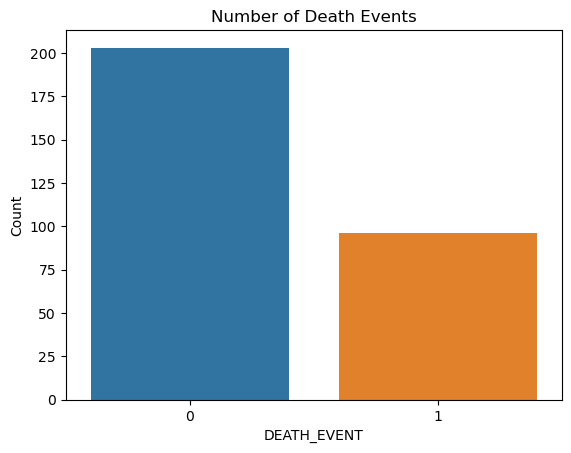

In [30]:
sns.countplot(data=df, x='DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.title('Number of Death Events')
plt.show()

Dari seluruh data jumlah pasien hidup lebih banyak ketimbang pasien meninggal

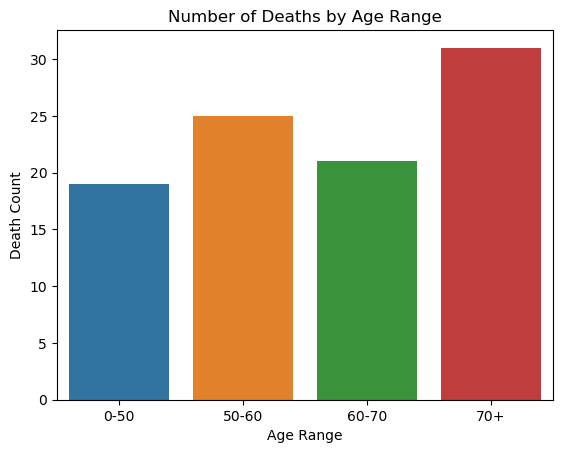

In [38]:
# Membuat rentang umur
bins = [0, 50, 60, 70, float('inf')]
labels = ['0-50', '50-60', '60-70', '70+']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels)

# Menghitung jumlah kematian dalam setiap rentang umur
age_death_counts = df.groupby('age_range')['DEATH_EVENT'].sum().reset_index()

# Membuat plot menggunakan Seaborn
sns.barplot(data=age_death_counts, x='age_range', y='DEATH_EVENT')
plt.xlabel('Age Range')
plt.ylabel('Death Count')
plt.title('Number of Deaths by Age Range')
plt.show()

Rentang umur pasien meninggal di angka 70 tahun keatas

# 6. Feature Engineering

## Cek Distribusi data

In [39]:
def diagnostic_plots(df, variable1, variable2, variable3, variable4):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable1], bins=20)
    plt.title('Histogram of ' + variable1)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable1])
    plt.title('Boxplot of ' + variable1)
    
    print('Skewness Value of', variable1,':', df[variable1].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable2], bins=20)
    plt.title('Histogram of ' + variable2)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable2])
    plt.title('Boxplot of ' + variable2)
    
    print('Skewness Value of', variable2,':', df[variable2].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable3], bins=20)
    plt.title('Histogram of ' + variable3)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable3])
    plt.title('Boxplot of ' + variable3)

    print('Skewness Value of', variable3,':', df[variable3].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable4], bins=20)
    plt.title('Histogram of ' + variable4)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable4])
    plt.title('Boxplot of ' + variable4)    
    
    print('Skewness Value of', variable4,':', df[variable4].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.show()

Skewness Value of age : 0.4230619067286355
Skewness Value of creatinine_phosphokinase : 4.463110084653752
Skewness Value of ejection_fraction : 0.5553827516973213
Skewness Value of platelets : 1.462320838275779


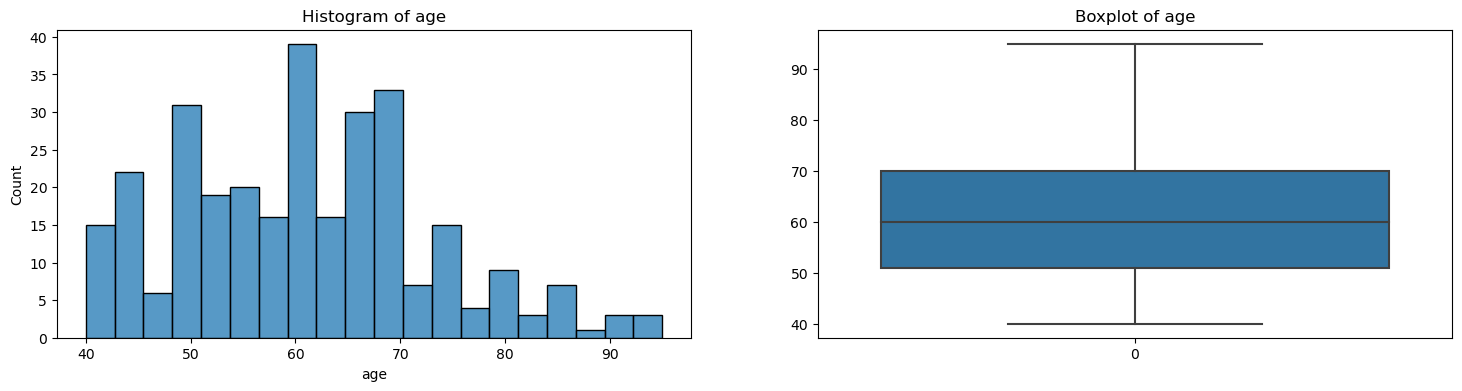

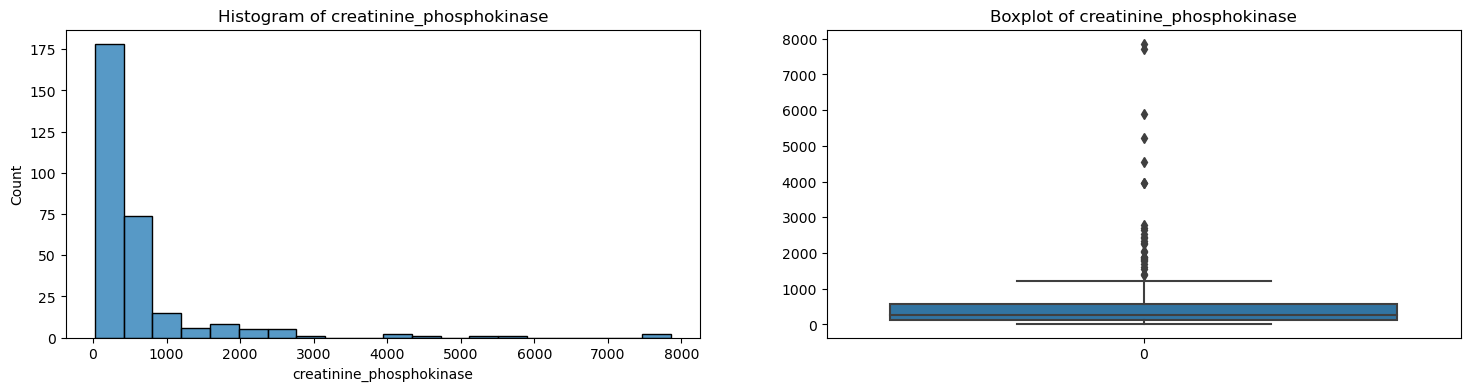

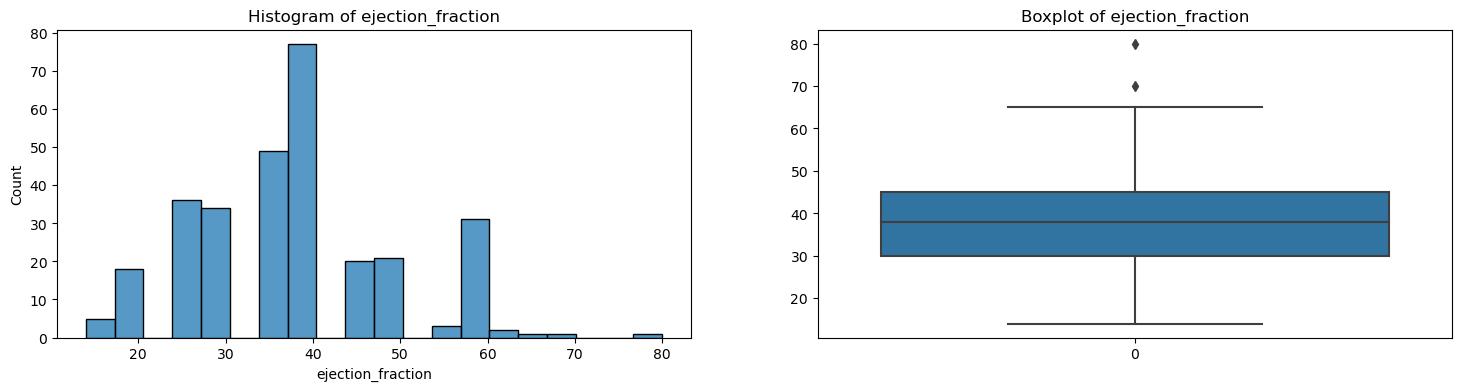

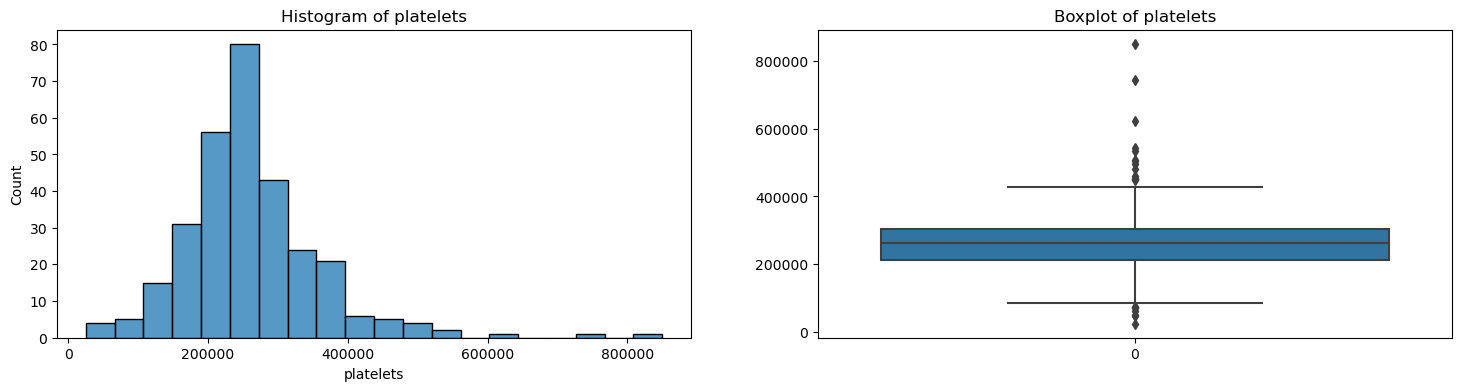

<Figure size 1800x400 with 0 Axes>

In [43]:
diagnostic_plots(df, 'age' , 'creatinine_phosphokinase' , 'ejection_fraction' , 'platelets')

In [49]:
def diagnostic_plots1(df, variable1, variable2, variable3):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable1], bins=20)
    plt.title('Histogram of ' + variable1)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable1])
    plt.title('Boxplot of ' + variable1)
    
    print('Skewness Value of', variable1,':', df[variable1].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable2], bins=20)
    plt.title('Histogram of ' + variable2)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable2])
    plt.title('Boxplot of ' + variable2)
    
    print('Skewness Value of', variable2,':', df[variable2].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable3], bins=20)
    plt.title('Histogram of ' + variable3)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable3])
    plt.title('Boxplot of ' + variable3)

    print('Skewness Value of', variable3,':', df[variable3].skew() )

Skewness Value of serum_creatinine : 4.455995882049029
Skewness Value of serum_sodium : -1.0481360160574988
Skewness Value of time : 0.12780264559841178


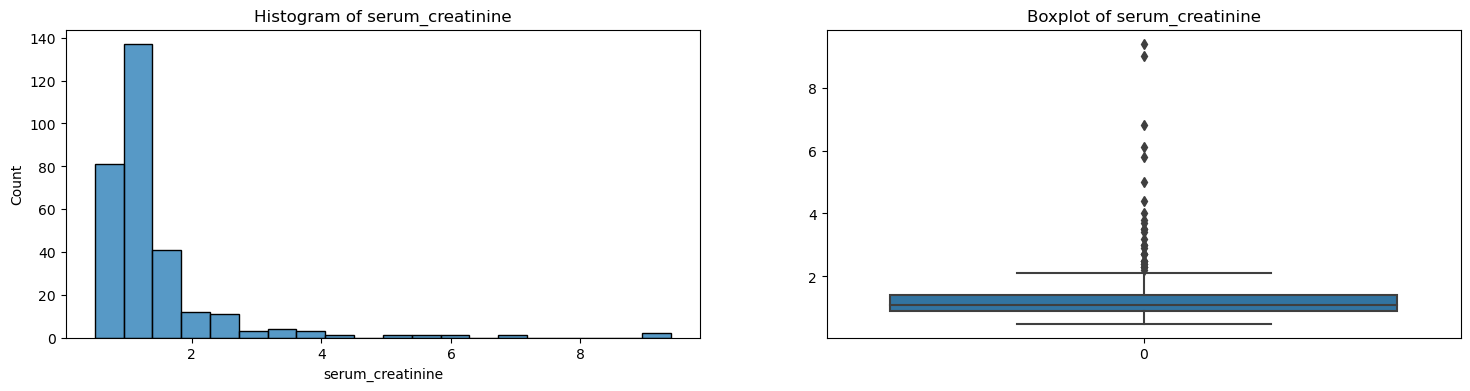

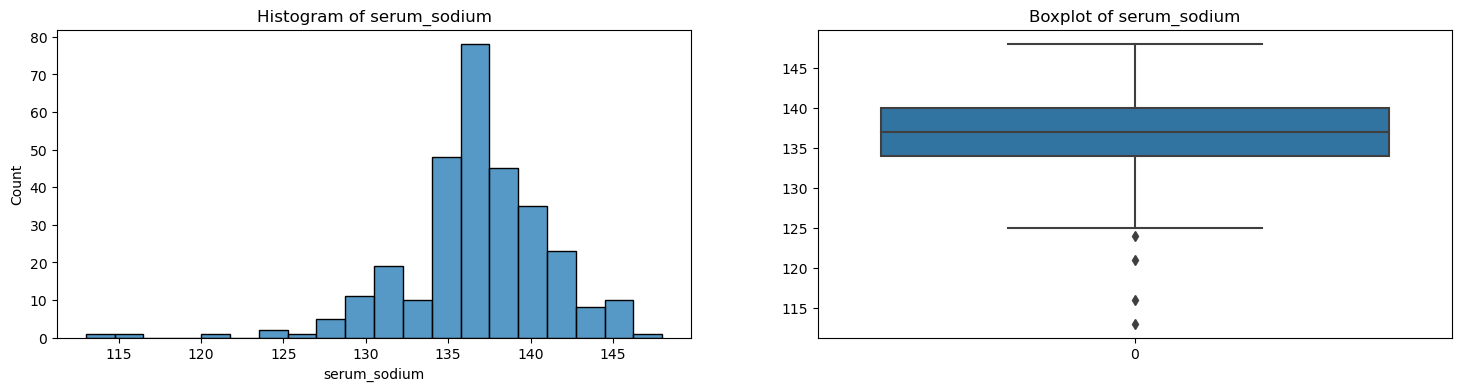

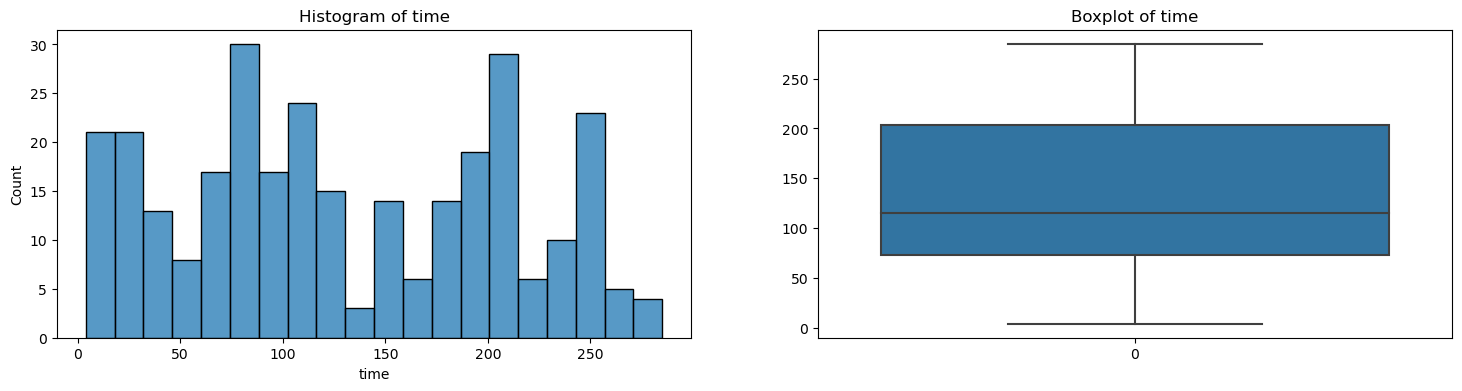

In [50]:
diagnostic_plots1(df, 'serum_creatinine' , 'serum_sodium' , 'time')

Distribusi Data tidak normal

In [84]:
df_new= df.copy()

# Split X dan Y

In [85]:
# spliting X dan y
X = df_new.drop(['DEATH_EVENT' , 'age_range'], axis=1)
y = df_new['DEATH_EVENT']
X.shape


(299, 12)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (239, 12)
Test Size  :  (60, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
70,53.0,0,207,1,40,0,223000.00,1.20,130,0,0,214
10,60.0,1,156,1,25,1,318000.00,1.20,137,0,0,85
0,42.0,1,250,1,15,0,213000.00,1.30,136,0,0,65
240,52.0,0,3966,0,40,0,325000.00,0.90,140,1,1,146
251,70.0,0,122,1,45,1,284000.00,1.30,136,1,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...
222,58.0,0,132,1,38,1,253000.00,1.00,139,1,0,230
89,42.0,0,582,0,60,0,263358.03,1.18,137,0,0,82
166,52.0,1,191,1,30,1,334000.00,1.00,142,1,1,216
68,65.0,1,720,1,40,0,257000.00,1.00,136,0,0,210


In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 70 to 77
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    float64
 1   anaemia                   239 non-null    int64  
 2   creatinine_phosphokinase  239 non-null    int64  
 3   diabetes                  239 non-null    int64  
 4   ejection_fraction         239 non-null    int64  
 5   high_blood_pressure       239 non-null    int64  
 6   platelets                 239 non-null    float64
 7   serum_creatinine          239 non-null    float64
 8   serum_sodium              239 non-null    int64  
 9   sex                       239 non-null    int64  
 10  smoking                   239 non-null    int64  
 11  time                      239 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 24.3 KB


In [88]:
# Definisikan pipeline
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("clf", RandomForestClassifier(random_state=42))
])

# Definisikan grid parameter
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
}

# Buat objek GridSearchCV
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

# Melatih model dan mencari parameter terbaik
grid.fit(X_train, y_train)

# Evaluasi model
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.86
Test set score: 0.87
Best parameters: {'clf__max_depth': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}


In [90]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_index_)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])
{'clf__max_depth': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
19


In [91]:
best_estimator = grid.best_estimator_


In [92]:
y_pred_train_hyp=best_estimator.predict(X_train)
y_pred_test_hyp=best_estimator.predict(X_test)


F1 Score - Test Set   :  0.7777777777777778 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.82      0.74      0.78        19

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60
 

ROC-AUC Train :  1.0 

ROC-AUC Test:  0.8318356867779204 

Confusion Matrix      : 


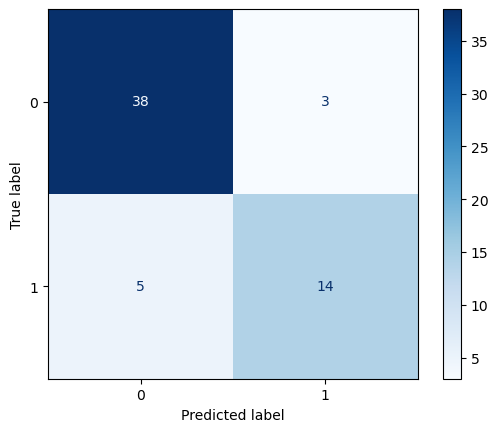

In [94]:
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_hyp), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_hyp), '\n')
print('ROC-AUC Train : ', roc_auc_score(y_train, y_pred_train_hyp), '\n')
print('ROC-AUC Test: ', roc_auc_score(y_test, y_pred_test_hyp), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_estimator, X_test, y_test, cmap='Blues'))